<h1>The Sparks Foundation</h1>
<h2>TASK 1 - Prediction using Supervised ML</h2>


* To Predict the percentage of marks of the students based on the number of hours they studied.
*   This is simple linear regression task as it involves just two variables.


*   Dataset : http://bit.ly/w-data

*   What will be predicted score if a student studies for 9.25 hrs/ day?

<h3><b>Author - Chandan Soren </b></h3>






####Import Libaries

In [ ]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####Ignore Warnings

In [ ]:
#importing and reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

#### Checking and visualising data

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#number of rows and columns
df.shape

(25, 2)

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Checking for Null values

In [ ]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Data Visualization

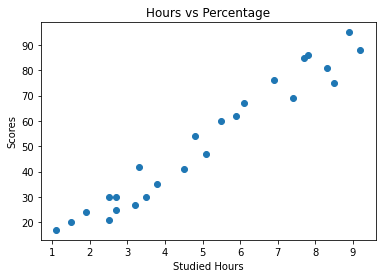

In [ ]:
#Hours Vs Percentage of Scores
plt.scatter(df['Hours'], df['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

#### Model Training

1) Splitting the Data

In [ ]:
# Defining X and y from the data
X =df.iloc[:,:-1].values
y =df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

2)Training the Simple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

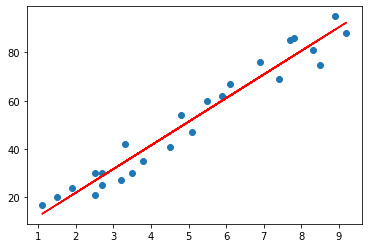

In [ ]:
#Plotting the regression line
line = model.coef_*X + model.intercept_

#Plotting for test data
plt.scatter(X,y)
plt.plot(X, line, color = 'red')
plt.show()

In [ ]:
#Predicting the test set result
y_pred = model.predict(X_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

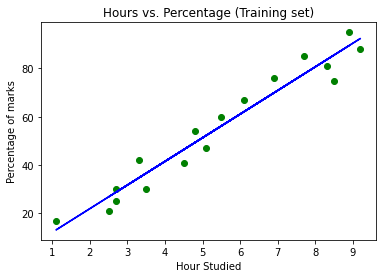

In [ ]:
#Visualizing the training set result
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hour Studied')
plt.ylabel('Percentage of marks')
plt.show()

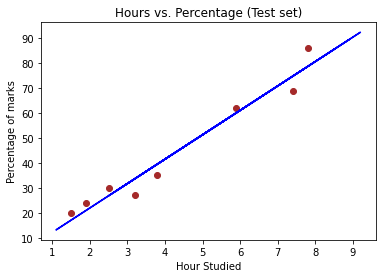

In [ ]:
#Visualizing the test set result
plt.scatter(X_test, y_test, color = 'brown')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hour Studied')
plt.ylabel('Percentage of marks')
plt.show()

In [ ]:
#Comparing the actual values with the predicted ones.
df =  pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


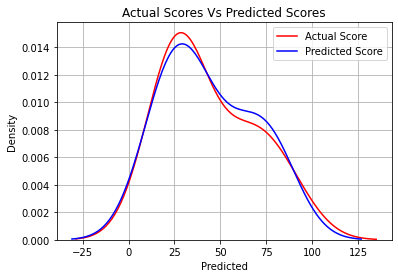

In [ ]:
title = "Actual Scores Vs Predicted Scores"
ax1 = sns.distplot(df["Actual"], hist = False , color = "red" , label = "Actual Score")
sns.distplot(df["Predicted"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.title(title)
plt.show()

####Error Metrics

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("The R-Square of the model:", r2_score(y_test, y_pred))

Mean Absolute Error: 4.419727808027651
The R-Square of the model: 0.9568211104435257


####Prediction

In [ ]:
#Predicting the score
df = np.array(9.5)
df = df.reshape(-1,1)
pred = model.predict(df)
print("If the student studied for 9.5 hours/day, the score is {}." .format(pred))

If the student studied for 9.5 hours/day, the score is [95.36219891].
